[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/samuelmurail/jupyter_training_course/master?filepath=notebook/03_Interactive_data_analysis.ipynb)

# Interactive data analysis, Numpy, Pandas and Scipy

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib

## Notebook customisation

In [2]:
# Change default size of plots
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Numpy

## NumPy Basics

Numpy from _Numerical Python_ is the fundamental package for scientific computing with Python. A lot of package are using _Numpy_'s object like _Pandas_ and _Scipy_. 

Features according to [Numpy website](https://www.numpy.org/):
- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

By convention most people use this command to import _Numpy_:

```python
import numpy as np
```

## NumPy Basics (2)

Classical Python list can be considered as a dynamic list of pointer :  
$ [O_{x}, O_{y}, O_{z}, ...]$  

Pointer are the adress of the object which can be of any types:  
$ O_{x} \Rightarrow "Hello World!" $  
$ O_{y} \Rightarrow 3.789056 $  
$ O_{z} \Rightarrow 3 $    

Each access to the value of a list element takes ~ 10 ns, this is fast but when doing operation on list elements, the type of each object has to be checked for every operation. 

Using numpy, an array doesn't contain the adresses of objects but the values itself. As the numpy array contains only one type of object (int16, float32, ...), all numpy operations are faster (No need to check value type or errors).


In [11]:
import random
import numpy as np
N = 10000000

a = [random.random() for i in range(N)]
a_np = np.array(a, dtype=np.float16)

%timeit a[-1]
%timeit a_np[-1]

%timeit sum(a)
%timeit sum(a_np)

35.3 ns ± 0.325 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
105 ns ± 6.77 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
41.5 ms ± 6.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.39 s ± 20.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Numpy array

In [3]:
data = [[8, 4.5, 10, 50],
        [25., 65, 20.3, 89]]

data_np = np.array(data)
data_np

array([[ 8. ,  4.5, 10. , 50. ],
       [25. , 65. , 20.3, 89. ]])

In [4]:
data_np.ndim

2

In [5]:
data_np.shape

(2, 4)

In [6]:
data_np.dtype

dtype('float64')

## Numpy array (2)

Numpy array can be created from an existing list with `np.array()`. Other functions are:
- `np.arange()` same as range() but 

In [7]:
a=np.arange(4, 10, 0.2)

In [8]:
a.shape

(30,)

- `np.ones()`, `np.zeros()` and `np.empty()` to create np array with respectively, 1, 0 or just allocate memory.   

## Numpy array (3)

The newaxis expression is used to increase the dimension

In [9]:
a = np.arange(0, 51, 10)
b = np.arange(0, 51, 10)[:,np.newaxis]
b

array([[ 0],
       [10],
       [20],
       [30],
       [40],
       [50]])

In [10]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [11]:
np.arange(0, 51, 10)[:,np.newaxis] + np.arange(6)

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

<img src="pictures/numpy_indexing.png" alt="Drawing" style="float:center; width: 70%;"/>

<sup>source: http://scipy-lectures.org/intro/numpy/array_object.html</sup>

## Numpy array (4)

You can pass as argument the type of your array using the keyword `dtype`:
- int8 ... int64, integers 8-bit to 64-bit
- float16 ... float128, floating point from half precision to extended precision
- complex64 ... complex256, complex numbers
- bool, boolean type
- object, string_, unicode_

Note that in opposition to python list, numpy cannot mix different types of variable in the same array.

In [12]:
np.ones((2, 5), dtype=np.float32) # Standard single precision = float32

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

## Linear Algebra

In [13]:
a = np.array([[1, 2, 3], [3, 4, 6.7], [5, 9.0, 5]])
b = a.transpose()

In [14]:
# compute a' such as a*a' = identity matrix
np.linalg.inv(b)

array([[-2.27683616,  1.04519774,  0.39548023],
       [ 0.96045198, -0.56497175,  0.05649718],
       [ 0.07909605,  0.1299435 , -0.11299435]])

In [15]:
b = np.random.rand(3, 3) * 20
b

array([[ 8.94200172,  2.05069311,  0.23187339],
       [14.43339922, 11.91219868, 13.76054123],
       [11.62250632, 16.88637851, 11.14477722]])

In [16]:
# Matrix multiplication can be done with @, but only for Numpy > 1.1 and Python > 3.5
a @ b
# Else, use "np.dot(a,b)"

array([[ 72.67631911,  76.53422599,  61.18728751],
       [162.43039436, 166.93961004, 130.40779245],
       [232.72313316, 201.89514621, 180.72812413]])

## Numpy is fast !!

Let's create a random list of 1 Million points and do the addition:

In [17]:
import random
N = 1000000
a = [random.random() for i in range(N)]
b = [random.random() for i in range(N)]

%timeit [a[i] + b[i] for i in range(N)]

119 ms ± 1.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


And now with numpy :

In [18]:
a_np = np.array(a)
b_np = np.array(b)

%timeit a_np + b_np

1.51 ms ± 1.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Numpy is fast !! (2)

With numpy the operation is ~100 times faster. Let's have a look on builtin functions like `sum()` and `np.sum()`:

In [19]:
%timeit sum_a = sum(a)

5.82 ms ± 1.43 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%timeit sum_a = np.sum(a_np)

354 µs ± 863 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


~10 times faster.

## Be carefull with Numpy!

If your code is badly written with division by zero, no Error will be raised.
Numpy objects are treated like in C, differently as python objects.

In [14]:
45/0

ZeroDivisionError: division by zero

In [17]:
a = np.array([-1, 45, -30, 0])
b = a/0
b

/Users/smurail/miniconda3/envs/jupyter_course/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/smurail/miniconda3/envs/jupyter_course/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([-inf,  inf, -inf,  nan])

## Be carefull with Numpy! (2)

$Nan$ values have to be treated specificaly:

In [22]:
b == np.nan

array([False, False, False, False])

In [23]:
np.isnan(b)

array([False, False, False,  True])

np.empty() is not empty but filled with what was previously asigned on the same bytes:

In [27]:
np.empty([2, 2])

array([[1.73059698e-077, 2.47032823e-323],
       [1.04718130e-142, 6.95338741e-309]])

# Scipy  

- built in top of the NumPy
- Linear Algebra
- Data Science features

## Scipy packages:

- `special` Special Function package (Cubic Root, Exponential, Permutation and Combinations, ...)
- `linalg` Linear Algebra
- `fftpack` Discrete Fourier Transform
- `optimize` Optimization and Fit
- `ndimage` Image Processing
- `integrate` Numerical Integration
- ...

## Optimization and Fit in SciPy – scipy.optimize

Using `curve_fit()` we will do a non-linear least squares to fit a function, f, to our data.

Here I will use a simple function $ f(\theta) = \alpha * sin(\theta + \beta)$.

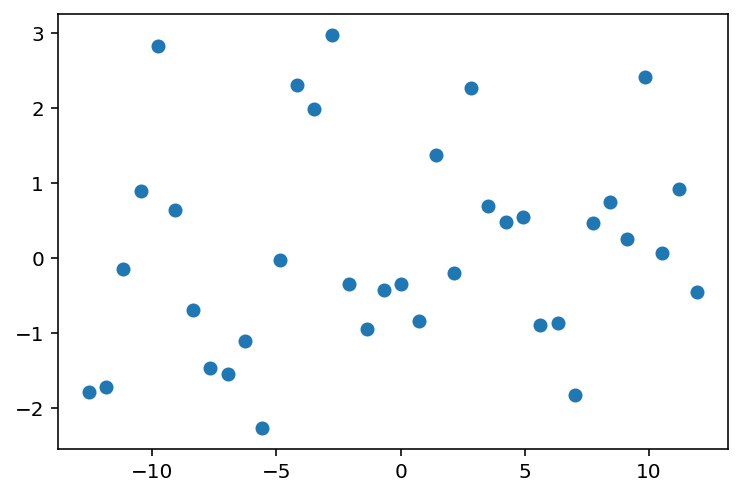

In [107]:
import matplotlib.pyplot as plt

a = 1.75
b = 4.78
d_theta = 0.7

def func_sin_a_b(theta, a, b):
    return (a*np.sin(theta+b))

theta = np.arange(-4*np.pi, 4*np.pi, d_theta)
y = func_sin_a_b(theta, a, b) + 3*(np.random.rand(len(theta)) - 0.5)

plt.scatter(theta, y)

## Optimization and Fit in SciPy – scipy.optimize (2)

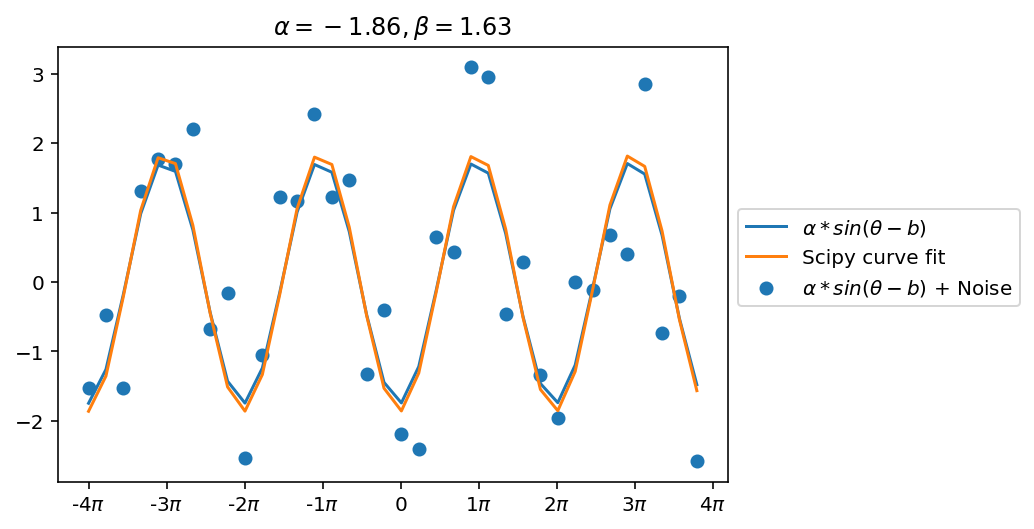

In [106]:
from matplotlib.ticker import FuncFormatter, MultipleLocator
from scipy.optimize import curve_fit

fit_sin, pcov = curve_fit(func_sin_a_b, theta, y)

fig, ax = plt.subplots(1)
ax.scatter(theta, y, label=r'$\alpha * sin(\theta - b)$ + Noise')
ax.plot(theta, func_sin_a_b(theta, a, b), label=r'$\alpha * sin(\theta - b)$')
ax.plot(theta, func_sin_a_b(theta, fit_sin[0], fit_sin[1]), label='Scipy curve fit')
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val//np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax.legend(bbox_to_anchor=(1.0, 0.65))
ax.set_title(r'$ \alpha = {:.2f}, \beta = {:.2f}$'.format(*fit_sin));

# Pandas

## Pandas

Like _Numpy_, _Pandas_ contains data structure and data manipulation tools, however _Pandas_ can deal with heterogenous data tables, while adopting _Numpy_'s array-based computing. 

By convention most people use this command to import pandas:

```python
import pandas as pd
```

_Pandas_ contains two important data structures $Series$ and $DataFrame$.


## Pandas _Series_

_Series_ are a one-dimention array objects. They contains sequence of values that can be associated to data labels or _index_.

In [21]:
test_serie = pd.Series(range(5), ['a', 'b', 'c', 'd', 'e'])
test_serie

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [22]:
test_serie.e 

4

In [23]:
test_serie['e']

4

In [24]:
test_serie[4]

4

## Operation on series

In [25]:
(test_serie * 10) + 1.5

a     1.5
b    11.5
c    21.5
d    31.5
e    41.5
dtype: float64

In [26]:
test2_serie = pd.Series(range(5), ['b', 'c', 'd', 'e', 'f'])

In [27]:
test_serie + test2_serie

a    NaN
b    1.0
c    3.0
d    5.0
e    7.0
f    NaN
dtype: float64

## Select Data

In [28]:
test_serie*10 > 20

a    False
b    False
c    False
d     True
e     True
dtype: bool

In [29]:
test_serie[test_serie*10 > 20]

d    3
e    4
dtype: int64

## Pandas _DataFrame_

_DataFrame_ represents a table of data with heterogenous column type (int, float, bool,  string). 
_DataFrame_ can also be considered as an ordered dictionary of _Series_ sharing the same index.

In [30]:
random.seed(0)
student_grad = pd.DataFrame({'gender': ['M', 'F', 'M', 'M', 'F', 'F'],
                             'math': [random.random()*20 for _ in range(6)],
                             'biology': [random.random()*20 for _ in range(6)],
                             'french': [random.random()*20 for _ in range(6)],
                             'history': [random.random()*20 for _ in range(6)],
                             'physics': [random.random()*20 for _ in range(6)]},
                            index=['Anders', 'Olga', 'Peter', 'Icham', 'Nathalie', 'Aiko'])

In [31]:
student_grad

,gender,math,biology,french,history,physics
Anders,M,16.888437,15.675972,5.636757,16.204345,9.442854
Olga,F,15.159088,6.066255,15.116084,18.043319,2.014024
Peter,M,8.411432,9.531939,12.367380,6.202951,8.683437
Icham,M,5.178335,11.667641,5.010127,14.596635,12.217739
Nathalie,F,10.225494,18.162258,18.194925,17.976766,18.260221
Aiko,F,8.098683,10.093737,19.655710,13.679679,19.332127


## Data analysis

In [32]:
student_grad.loc['Olga']

gender           F
math       15.1591
biology    6.06625
french     15.1161
history    18.0433
physics    2.01402
Name: Olga, dtype: object

In [33]:
student_grad['mean'] = student_grad.mean(axis=1)
student_grad

,gender,math,biology,french,history,physics,mean
Anders,M,16.888437,15.675972,5.636757,16.204345,9.442854,12.769673
Olga,F,15.159088,6.066255,15.116084,18.043319,2.014024,11.279754
Peter,M,8.411432,9.531939,12.367380,6.202951,8.683437,9.039428
Icham,M,5.178335,11.667641,5.010127,14.596635,12.217739,9.734095
Nathalie,F,10.225494,18.162258,18.194925,17.976766,18.260221,16.563933
Aiko,F,8.098683,10.093737,19.655710,13.679679,19.332127,14.171987


## Merge Data

In [34]:
student_grad_2 = pd.DataFrame({'english': [random.random()*20 for _ in range(5)]},
                              index=['Olga', 'Peter', 'Icham', 'Nathalie', 'Aiko'])

In [35]:
all_grad = pd.concat([student_grad,student_grad_2], axis=1, sort=False)
all_grad

,gender,math,biology,french,history,physics,mean,english
Anders,M,16.888437,15.675972,5.636757,16.204345,9.442854,12.769673,NaN
Olga,F,15.159088,6.066255,15.116084,18.043319,2.014024,11.279754,9.540196
Peter,M,8.411432,9.531939,12.367380,6.202951,8.683437,9.039428,17.306199
Icham,M,5.178335,11.667641,5.010127,14.596635,12.217739,9.734095,5.209846
Nathalie,F,10.225494,18.162258,18.194925,17.976766,18.260221,16.563933,16.100557
Aiko,F,8.098683,10.093737,19.655710,13.679679,19.332127,14.171987,10.973986


## Filter Data

In [36]:
all_grad.isna()

,gender,math,biology,french,history,physics,mean,english
Anders,False,False,False,False,False,False,False,True
Olga,False,False,False,False,False,False,False,False
Peter,False,False,False,False,False,False,False,False
Icham,False,False,False,False,False,False,False,False
Nathalie,False,False,False,False,False,False,False,False
Aiko,False,False,False,False,False,False,False,False


In [37]:
# Which grades are above 10?
# We can't calculate a gender > 10, so we drop that column
all_grad2 = all_grad.drop(columns='gender')
all_grad2 > 10

,math,biology,french,history,physics,mean,english
Anders,True,True,False,True,False,True,False
Olga,True,False,True,True,False,True,False
Peter,False,False,True,False,False,False,True
Icham,False,True,False,True,True,False,False
Nathalie,True,True,True,True,True,True,True
Aiko,False,True,True,True,True,True,True


## Data frame instance and function

In [38]:
all_grad.columns

Index(['gender', 'math', 'biology', 'french', 'history', 'physics', 'mean',
       'english'],
      dtype='object')

In [39]:
all_grad.index

Index(['Anders', 'Olga', 'Peter', 'Icham', 'Nathalie', 'Aiko'], dtype='object')

In [40]:
# For each student, calculate the mean of all subjects 
#   but "mean" is not a subject, so let's drop it
all_grad.drop(columns='mean').mean(axis=1)

Anders      12.769673
Olga        10.989828
Peter       10.417223
Icham        8.980054
Nathalie    16.486703
Aiko        13.638987
dtype: float64

## Data frame selection

Don't forget the brackets when combining conditions:

In [56]:
# Only Olga and Nathalie have both math and french > 10
all_grad[ (all_grad['math'] > 10) & (all_grad['french'] > 10)]

,gender,math,biology,french,history,physics,mean,english
Olga,F,15.159088,6.066255,15.116084,18.043319,2.014024,11.279754,9.540196
Nathalie,F,10.225494,18.162258,18.194925,17.976766,18.260221,16.563933,16.100557


In [42]:
all_grad.loc[['Olga'], ['math', 'biology']]

,math,biology
Olga,15.159088,6.066255


In [43]:
# Equivalent: Olga is student 1, and math and biology are column 1 and 2
# Python starts counting at 0!
all_grad.iloc[1, [1, 2]]

math       15.1591
biology    6.06625
Name: Olga, dtype: object

## Function Application and mapping

Let's say that you want to compute the gap between the worst and best grad, you can define your one function and apply it to every column, or line:

In [44]:
gap_f = lambda x: x.max() - x.min()
all_grad.drop(columns=['gender']).apply(gap_f)

math       11.710102
biology    12.096003
french     14.645583
history    11.840368
physics    17.318103
mean        7.524505
english    12.096352
dtype: float64

In [45]:
all_grad.drop(columns=['gender']).apply(gap_f, axis='columns')

Anders      11.251680
Olga        16.029295
Peter       11.103247
Icham        9.586508
Nathalie     8.034727
Aiko        11.557027
dtype: float64

## Sorting and counting

You want to get the ranking of student base on their mean grade:

In [46]:
all_grad.sort_values(by='mean', ascending=False)

,gender,math,biology,french,history,physics,mean,english
Nathalie,F,10.225494,18.162258,18.194925,17.976766,18.260221,16.563933,16.100557
Aiko,F,8.098683,10.093737,19.655710,13.679679,19.332127,14.171987,10.973986
Anders,M,16.888437,15.675972,5.636757,16.204345,9.442854,12.769673,NaN
Olga,F,15.159088,6.066255,15.116084,18.043319,2.014024,11.279754,9.540196
Icham,M,5.178335,11.667641,5.010127,14.596635,12.217739,9.734095,5.209846
Peter,M,8.411432,9.531939,12.367380,6.202951,8.683437,9.039428,17.306199


Number of course validated:

In [47]:
(all_grad.drop(columns=['gender', 'mean']) > 10).sum(axis=1)

Anders      3
Olga        3
Peter       2
Icham       3
Nathalie    6
Aiko        5
dtype: int64

## GroupBy 

The `groupby()` mechanics has been integrated similarly as in `R`. It will split a `DataFrame` into groups based on one or more _keys_ to then apply any statistics.

In [48]:
all_grad.groupby(all_grad['gender']).mean()

,math,biology,french,history,physics,mean,english
gender,,,,,,,
F,11.161088,11.440750,17.655573,16.566588,13.202124,14.005225,12.204913
M,10.159401,12.291851,7.671421,12.334644,10.114677,10.514399,11.258022


## Visualising dataset

In [49]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [50]:
# print 2 first lines
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [51]:
# print 2 last lines
iris.tail(2)

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## [Qgrid](https://github.com/quantopian/qgrid)

_"Qgrid is a Jupyter notebook widget which uses SlickGrid to render pandas DataFrames within a Jupyter notebook. This allows you to explore your DataFrames with intuitive scrolling, sorting, and filtering controls, as well as edit your DataFrames by double clicking cells."_

In [52]:
import qgrid
qgrid_widget = qgrid.show_grid(iris, show_toolbar=True, grid_options={'maxVisibleRows':5})
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…